In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# ODE vector field visualizations
This notebook shows examples of functions Neural ODEs cannot approximate and how this affects the learned vector fields.

#### Create an ODE function

In [4]:
from anode.models import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

#### Visualize vector field of ODE function
We can visualize what the randomly initialized ODE function's vector field looks like.

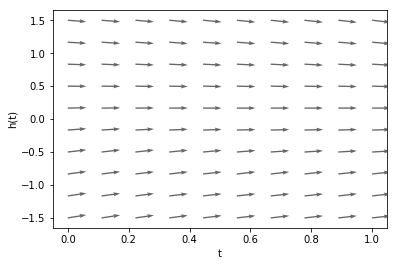

In [6]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

## Create functions to approximate

We will approximate two functions: an easy one (the identity mapping) and a hard one (correspond to g_1d in the paper)

In [8]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

#### Visualize the data

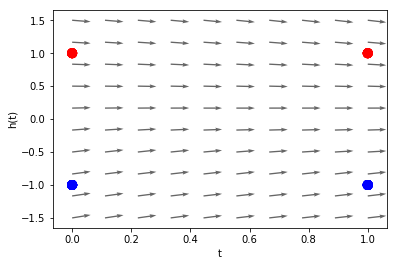

In [9]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

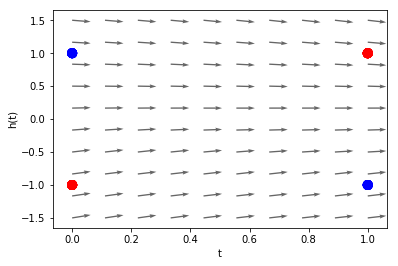

In [10]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

## Train a model on data

We can now try to fit a Neural ODE to the two functions

In [11]:
from anode.models import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

#### Train model on easy data

In [12]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 0.000

Ite

#### Visualize model trajectories
As can be seen, the learned vector field maps the inputs to targets correctly.

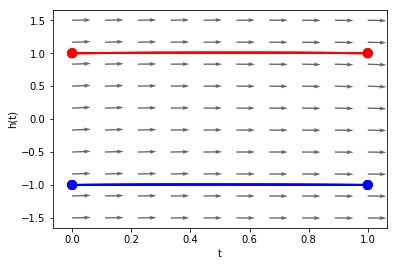

In [13]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

#### Train model on hard data

In [14]:
trainer_hard.train(dataloader_hard, num_epochs=50)


Iteration 0/16
Loss: 1.454
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.436
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.426
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.434
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 1.444

Iteration 0/16
Loss: 1.475
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.438
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.436
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.372
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 1.411

Iteration 0/16
Loss: 1.337
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.376
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.364
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.401
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 1.376

Iteration 0/16
Loss: 1.341
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.353
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.372
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.316
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 1.334

Ite

Total NFE: 26

Iteration 15/16
Loss: 0.512
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 34: 0.541

Iteration 0/16
Loss: 0.518
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.532
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.545
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.540
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 35: 0.539

Iteration 0/16
Loss: 0.559
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.558
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.543
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 15/16
Loss: 0.545
NFE: 38
BNFE: 0
Total NFE: 38
Epoch 36: 0.536

Iteration 0/16
Loss: 0.547
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 5/16
Loss: 0.526
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.546
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.527
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 37: 0.534

Iteration 0/16
Loss: 0.530
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.514
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.495
NFE: 32
BNFE: 0


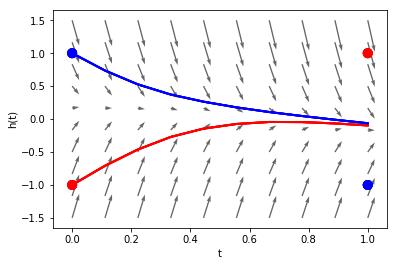

In [15]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)

## Augmented Neural ODEs
As can be seen, Neural ODEs struggle to fit the hard function. In fact, it can be proven that Neural ODEs cannot represent this function. In order to overcome this, we can use Augmented Neural ODEs which extend the space on which the ODE is solved. Examples of this are shown in the `augmented-neural-ode-example` notebook.